# Analyze Swiss Roll dataset

In [1]:
import numpy as np
import scipy.sparse as sp
import matplotlib.pyplot as plt
savepath = "dataset/precomputed/swiss_roll"

In [2]:
def plot_graph(A,node_colors,coords,fig=None,ax=None,s=20):
    if fig is None:
        fig,ax = plt.subplots()
    ax.scatter(coords[:,0],coords[:,1],c=node_colors,s=s)
    G = A.tocoo()
    for ei,ej in zip(G.row,G.col):
        ax.plot(
            [coords[ei][0],coords[ej][0]],
            [coords[ei][1],coords[ej][1]],
            c='black',zorder=-10,linewidth=0.2)
    ax.axis('off')
    return fig,ax

In [3]:
all_class_colors = [(1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353)]

## Load and plot original Swiss Roll graph

Text(0.5, 1.0, 'true labels')

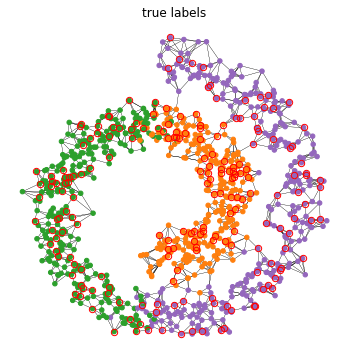

In [16]:
ei,ej,e = [],[],[]
with open(f"{savepath}/edge_list_orig.txt","r") as f:
    lines = f.readlines()
    num_nodes = int(lines[0].strip().split(' ')[0])
    for line in lines[1::]:
        line = line.strip().split(' ')
        ei.append(int(line[0]))
        ej.append(int(line[1]))
        e.append(int(line[2]))
G_orig = sp.csr_matrix((e,(ei,ej)),(num_nodes,num_nodes))
labels = np.load(f"{savepath}/labels.npy")
coords = np.load(f"{savepath}/coords.npy")
with open(f"{savepath}/train_nodes.txt","r") as f:
    lines = f.readlines()
    train_nodes = [int(i.strip()) for i in lines]
with open(f"{savepath}/val_nodes.txt","r") as f:
    lines = f.readlines()
    val_nodes = [int(i.strip()) for i in lines]
with open(f"{savepath}/test_nodes.txt","r") as f:
    lines = f.readlines()
    test_nodes = [int(i.strip()) for i in lines]

node_colors_class_truth = np.array([all_class_colors[i] for i in labels])
fig,ax = plt.subplots(figsize=(6,6))
plot_graph(G_orig,node_colors_class_truth,coords,fig=fig,ax=ax,s=20)
ax.scatter(coords[train_nodes,0],coords[train_nodes,1],edgecolors=(1,0,0),facecolors=(0,0,0,0),s=40,linewidths=1.0)
ax.scatter(coords[val_nodes,0],coords[val_nodes,1],edgecolors=(1,0,0),facecolors=(0,0,0,0),s=40,linewidths=1.0)
ax.set_title('true labels')

## Load precomputed graph and lens

Text(0.5, 1.0, 'predicted labels')

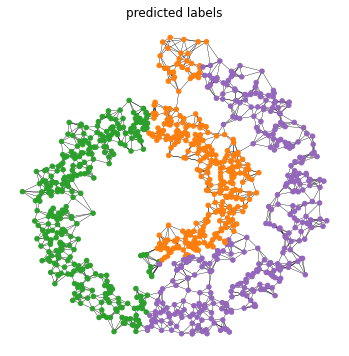

In [15]:
ei,ej,e = [],[],[]
with open(f"{savepath}/edge_list.txt","r") as f:
    lines = f.readlines()
    num_nodes = int(lines[0].strip().split(' ')[0])
    for line in lines[1::]:
        line = line.strip().split(' ')
        ei.append(int(line[0]))
        ej.append(int(line[1]))
        e.append(int(line[2]))
G = sp.csr_matrix((e,(ei,ej)),(num_nodes,num_nodes))
preds = np.load(f"{savepath}/prediction_lens.npy")
pred_labels = np.argmax(preds,1)

node_colors_class = np.array([all_class_colors[i] for i in pred_labels])
fig,ax = plt.subplots(figsize=(6,6))
plot_graph(G_orig,node_colors_class,coords,fig=fig,ax=ax,s=20)
ax.set_title('predicted labels')

## Compute Reeb graph and estimated errors

In [6]:
from GTDA.GTDA_utils import compute_reeb, NN_model
from GTDA.GTDA import GTDA

nn_model = NN_model()
nn_model.preds = preds
nn_model.labels = labels
nn_model.A = G
nn_model.train_mask = np.zeros(G.shape[0])
nn_model.train_mask[train_nodes] = 1
nn_model.val_mask = np.zeros(G.shape[0])
nn_model.val_mask[val_nodes] = 1
nn_model.test_mask = np.zeros(G.shape[0])
nn_model.test_mask[test_nodes] = 1
smallest_component = 20
overlap = (0,0.1) # only extend each bin's right boundary by 10%
labels_to_eval = list(range(preds.shape[1]))
GTDA_record = compute_reeb(GTDA,nn_model,labels_to_eval,smallest_component,overlap,extra_lens=None,
    node_size_thd=5,reeb_component_thd=5,nprocs=10,device='cuda')

Preprocess lens


100%|██████████| 1/1 [00:00<00:00, 290.22it/s]


Iteration 1
1 components to split
Grouping took 0.0006473064422607422 seconds


100%|██████████| 1/1 [00:00<00:00, 324.84it/s]


Min/max largest difference: 1.0, 1.0
New components sizes:
Counter({676: 1, 342: 1})
Splitting took 0.004775285720825195 seconds
Iteration 2
2 components to split
Grouping took 0.0007181167602539062 seconds


100%|██████████| 2/2 [00:00<00:00, 538.08it/s]


Min/max largest difference: 0.5556336785060856, 1.0
New components sizes:
Counter({338: 1, 10: 1, 3: 1, 332: 1, 240: 1, 117: 1, 12: 1})
Splitting took 0.004843473434448242 seconds
Iteration 3
4 components to split
Grouping took 0.0010712146759033203 seconds


100%|██████████| 4/4 [00:00<00:00, 774.54it/s]


Min/max largest difference: 0.30732730105760997, 0.547553145550956
New components sizes:
Counter({2: 2, 3: 2, 281: 1, 37: 1, 21: 1, 315: 1, 14: 1, 4: 1, 225: 1, 16: 1, 51: 1, 43: 1, 9: 1, 1: 1, 8: 1})
Splitting took 0.006470441818237305 seconds
Iteration 4
7 components to split
Grouping took 0.0017876625061035156 seconds


100%|██████████| 7/7 [00:00<00:00, 948.23it/s]


Min/max largest difference: 0.1273263620683075, 0.4306251755620981
New components sizes:
Counter({1: 11, 4: 4, 3: 3, 12: 3, 7: 2, 14: 2, 6: 2, 8: 2, 307: 1, 261: 1, 189: 1, 15: 1, 11: 1, 28: 1, 21: 1, 10: 1, 16: 1, 5: 1})
Splitting took 0.008671283721923828 seconds
Iteration 5
5 components to split
Grouping took 0.0011627674102783203 seconds


100%|██████████| 5/5 [00:00<00:00, 781.18it/s]


Min/max largest difference: 0.06237974812076863, 0.26566046832888135
New components sizes:
Counter({1: 8, 10: 2, 6: 2, 9: 2, 8: 2, 2: 2, 297: 1, 215: 1, 17: 1, 24: 1, 80: 1, 103: 1, 4: 1, 3: 1, 5: 1})
Splitting took 0.008158683776855469 seconds
Iteration 6
5 components to split
Grouping took 0.0012903213500976562 seconds


100%|██████████| 5/5 [00:00<00:00, 946.03it/s]


Min/max largest difference: 0.11015378596156486, 0.2371950181490093
New components sizes:
Counter({12: 6, 1: 5, 3: 3, 8: 2, 7: 2, 6: 2, 283: 1, 14: 1, 163: 1, 9: 1, 18: 1, 5: 1, 4: 1, 35: 1, 16: 1, 51: 1, 13: 1})
Splitting took 0.006446123123168945 seconds
Iteration 7
4 components to split
Grouping took 0.001264333724975586 seconds


100%|██████████| 4/4 [00:00<00:00, 947.01it/s]


Min/max largest difference: 0.07308327782224044, 0.12514275542510944
New components sizes:
Counter({6: 2, 3: 2, 5: 2, 279: 1, 4: 1, 130: 1, 10: 1, 17: 1, 40: 1, 12: 1, 9: 1, 11: 1})
Splitting took 0.005330324172973633 seconds
Iteration 8
3 components to split
Grouping took 0.0007786750793457031 seconds


100%|██████████| 3/3 [00:00<00:00, 915.72it/s]


Min/max largest difference: 0.08415843104858445, 0.10593545418167129
New components sizes:
Counter({1: 7, 16: 2, 274: 1, 5: 1, 11: 1, 2: 1, 117: 1, 10: 1})
Splitting took 0.0043637752532958984 seconds
Iteration 9
2 components to split
Grouping took 0.000881195068359375 seconds


100%|██████████| 2/2 [00:00<00:00, 818.72it/s]


Min/max largest difference: 0.04594190007896078, 0.04619149317473739
New components sizes:
Counter({270: 1, 4: 1, 18: 1, 5: 1, 25: 1, 6: 1, 1: 1, 35: 1, 7: 1, 17: 1, 10: 1})
Splitting took 0.003534078598022461 seconds
Iteration 10
3 components to split
Grouping took 0.0010423660278320312 seconds


100%|██████████| 3/3 [00:00<00:00, 813.53it/s]


Min/max largest difference: 0.02234622269483634, 0.03518810086288393
New components sizes:
Counter({4: 4, 5: 4, 1: 2, 3: 2, 267: 1, 22: 1, 7: 1, 2: 1})
Splitting took 0.005219697952270508 seconds
Iteration 11
2 components to split
Grouping took 0.0006475448608398438 seconds


100%|██████████| 2/2 [00:00<00:00, 891.84it/s]


Min/max largest difference: 0.014601672674416531, 0.01965668480672877
New components sizes:
Counter({2: 3, 263: 1, 13: 1, 3: 1, 5: 1})
Splitting took 0.00333404541015625 seconds
Iteration 12
1 components to split
Grouping took 0.0006647109985351562 seconds


100%|██████████| 1/1 [00:00<00:00, 751.94it/s]


Min/max largest difference: 0.012943698867722064, 0.012943698867722064
New components sizes:
Counter({259: 1, 3: 1, 1: 1})
Splitting took 0.0025115013122558594 seconds
Iteration 13
1 components to split
Grouping took 0.0006659030914306641 seconds


100%|██████████| 1/1 [00:00<00:00, 671.09it/s]


Min/max largest difference: 0.0057551523251642926, 0.0057551523251642926
New components sizes:
Counter({253: 1, 8: 1})
Splitting took 0.0028867721557617188 seconds
Iteration 14
1 components to split
Grouping took 0.00035500526428222656 seconds


100%|██████████| 1/1 [00:00<00:00, 692.59it/s]


Min/max largest difference: 0.0031446131139916448, 0.0031446131139916448
New components sizes:
Counter({247: 1, 4: 1, 2: 1})
Splitting took 0.0027208328247070312 seconds
Iteration 15
1 components to split
Grouping took 0.00025844573974609375 seconds


100%|██████████| 1/1 [00:00<00:00, 711.02it/s]


Min/max largest difference: 0.003048821309779459, 0.003048821309779459
New components sizes:
Counter({245: 1, 3: 1})
Splitting took 0.0024771690368652344 seconds
Iteration 16
1 components to split
Grouping took 0.0006554126739501953 seconds


100%|██████████| 1/1 [00:00<00:00, 698.82it/s]


Min/max largest difference: 0.0014870966476074887, 0.0014870966476074887
New components sizes:
Counter({234: 1, 7: 1, 4: 1})
Splitting took 0.002744913101196289 seconds
Iteration 17
1 components to split
Grouping took 0.0003750324249267578 seconds


100%|██████████| 1/1 [00:00<00:00, 698.00it/s]


Min/max largest difference: 0.0006793562467252597, 0.0006793562467252597
New components sizes:
Counter({230: 1, 4: 1})
Splitting took 0.00249481201171875 seconds
Iteration 18
1 components to split
Grouping took 0.0002567768096923828 seconds


100%|██████████| 1/1 [00:00<00:00, 731.22it/s]


Min/max largest difference: 0.0005964661177152442, 0.0005964661177152442
New components sizes:
Counter({227: 1, 2: 1, 3: 1})
Splitting took 0.002738475799560547 seconds
Iteration 19
1 components to split
Grouping took 0.0002541542053222656 seconds


100%|██████████| 1/1 [00:00<00:00, 722.04it/s]


Min/max largest difference: 0.00031580379574522316, 0.00031580379574522316
New components sizes:
Counter({218: 1, 10: 1})
Splitting took 0.002477884292602539 seconds
Iteration 20
1 components to split
Grouping took 0.0006685256958007812 seconds


100%|██████████| 1/1 [00:00<00:00, 798.92it/s]


Min/max largest difference: 0.00023306990245841597, 0.00023306990245841597
New components sizes:
Counter({1: 3, 216: 1})
Splitting took 0.0025866031646728516 seconds
Iteration 21
1 components to split
Grouping took 0.0004947185516357422 seconds


100%|██████████| 1/1 [00:00<00:00, 740.39it/s]


Min/max largest difference: 0.00013093876067237767, 0.00013093876067237767
New components sizes:
Counter({213: 1, 3: 1})
Splitting took 0.0026941299438476562 seconds
Iteration 22
1 components to split
Grouping took 0.0003349781036376953 seconds


100%|██████████| 1/1 [00:00<00:00, 798.92it/s]


Min/max largest difference: 0.00010216719387001749, 0.00010216719387001749
New components sizes:
Counter({208: 1, 3: 1, 2: 1})
Splitting took 0.0026183128356933594 seconds
Iteration 23
1 components to split
Grouping took 0.0005419254302978516 seconds


100%|██████████| 1/1 [00:00<00:00, 724.78it/s]


Min/max largest difference: 4.511960876620779e-05, 4.511960876620779e-05
New components sizes:
Counter({205: 1, 2: 1, 1: 1})
Splitting took 0.0025033950805664062 seconds
Iteration 24
1 components to split
Grouping took 0.0006561279296875 seconds


100%|██████████| 1/1 [00:00<00:00, 765.52it/s]


Min/max largest difference: 3.002663483675505e-05, 3.002663483675505e-05
New components sizes:
Counter({197: 1, 7: 1, 1: 1})
Splitting took 0.0024013519287109375 seconds
Iteration 25
1 components to split
Grouping took 0.0006642341613769531 seconds


100%|██████████| 1/1 [00:00<00:00, 823.70it/s]


Min/max largest difference: 1.5116424688687353e-05, 1.5116424688687353e-05
New components sizes:
Counter({194: 1, 4: 1})
Splitting took 0.002718687057495117 seconds
Iteration 26
1 components to split
Grouping took 0.00047016143798828125 seconds


100%|██████████| 1/1 [00:00<00:00, 728.68it/s]


Min/max largest difference: 1.2131229225609275e-05, 1.2131229225609275e-05
New components sizes:
Counter({187: 1, 3: 1, 6: 1})
Splitting took 0.0027124881744384766 seconds
Iteration 27
1 components to split
Grouping took 0.00044417381286621094 seconds


100%|██████████| 1/1 [00:00<00:00, 753.02it/s]


Min/max largest difference: 6.192649768001632e-06, 6.192649768001632e-06
New components sizes:
Counter({178: 1, 9: 1, 1: 1})
Splitting took 0.002402782440185547 seconds
Iteration 28
1 components to split
Grouping took 0.00067138671875 seconds


100%|██████████| 1/1 [00:00<00:00, 722.16it/s]


Min/max largest difference: 3.502954993517271e-06, 3.502954993517271e-06
New components sizes:
Counter({173: 1, 3: 1, 1: 1, 4: 1})
Splitting took 0.0024819374084472656 seconds
Iteration 29
1 components to split
Grouping took 0.0003132820129394531 seconds


100%|██████████| 1/1 [00:00<00:00, 856.16it/s]


Min/max largest difference: 1.9049822988331216e-06, 1.9049822988331216e-06
New components sizes:
Counter({162: 1, 12: 1})
Splitting took 0.0024099349975585938 seconds
Iteration 30
1 components to split
Grouping took 0.0002460479736328125 seconds


100%|██████████| 1/1 [00:00<00:00, 769.60it/s]


Min/max largest difference: 1.3453256813011905e-06, 1.3453256813011905e-06
New components sizes:
Counter({1: 2, 155: 1, 4: 1, 3: 1})
Splitting took 0.002690553665161133 seconds
Iteration 31
1 components to split
Grouping took 0.00025391578674316406 seconds


100%|██████████| 1/1 [00:00<00:00, 759.42it/s]


Min/max largest difference: 7.043745955250037e-07, 7.043745955250037e-07
New components sizes:
Counter({1: 2, 152: 1, 2: 1})
Splitting took 0.0024232864379882812 seconds
Iteration 32
1 components to split
Grouping took 0.0006868839263916016 seconds


100%|██████████| 1/1 [00:00<00:00, 729.06it/s]


Min/max largest difference: 4.4749754080086745e-07, 4.4749754080086745e-07
New components sizes:
Counter({3: 2, 145: 1, 1: 1, 2: 1})
Splitting took 0.0024449825286865234 seconds
Iteration 33
1 components to split
Grouping took 0.0003719329833984375 seconds


100%|██████████| 1/1 [00:00<00:00, 726.79it/s]


Min/max largest difference: 2.3038298242533004e-07, 2.3038298242533004e-07
New components sizes:
Counter({2: 2, 137: 1, 1: 1, 3: 1})
Splitting took 0.0024552345275878906 seconds
Iteration 34
1 components to split
Grouping took 0.00067138671875 seconds


100%|██████████| 1/1 [00:00<00:00, 756.14it/s]


Min/max largest difference: 1.940749217999027e-07, 1.940749217999027e-07
New components sizes:
Counter({1: 2, 132: 1, 3: 1})
Splitting took 0.002383708953857422 seconds
Iteration 35
1 components to split
Grouping took 0.0006995201110839844 seconds


100%|██████████| 1/1 [00:00<00:00, 828.10it/s]


Min/max largest difference: 1.0513319911148214e-07, 1.0513319911148214e-07
New components sizes:
Counter({1: 2, 125: 1, 6: 1, 2: 1})
Splitting took 0.0024008750915527344 seconds
Iteration 36
1 components to split
Grouping took 0.0006659030914306641 seconds


100%|██████████| 1/1 [00:00<00:00, 762.46it/s]


Min/max largest difference: 8.384974004016499e-08, 8.384974004016499e-08
New components sizes:
Counter({118: 1, 5: 1, 1: 1, 2: 1})
Splitting took 0.0027582645416259766 seconds
Iteration 37
1 components to split
Grouping took 0.00045943260192871094 seconds


100%|██████████| 1/1 [00:00<00:00, 770.45it/s]


Min/max largest difference: 4.779682685535956e-08, 4.779682685535956e-08
New components sizes:
Counter({3: 1, 7: 1, 1: 1, 109: 1})
Splitting took 0.002377033233642578 seconds
Iteration 38
1 components to split
Grouping took 0.0002543926239013672 seconds


100%|██████████| 1/1 [00:00<00:00, 637.63it/s]


Min/max largest difference: 2.556748010013637e-08, 2.556748010013637e-08
New components sizes:
Counter({2: 2, 97: 1, 5: 1, 4: 1})
Splitting took 0.0029289722442626953 seconds
Iteration 39
1 components to split
Grouping took 0.00023937225341796875 seconds


100%|██████████| 1/1 [00:00<00:00, 935.81it/s]


Min/max largest difference: 1.341928271484348e-08, 1.341928271484348e-08
New components sizes:
Counter({1: 3, 89: 1, 2: 1, 4: 1})
Splitting took 0.0021409988403320312 seconds
Iteration 40
1 components to split
Grouping took 0.0002548694610595703 seconds


100%|██████████| 1/1 [00:00<00:00, 593.25it/s]


Min/max largest difference: 6.7785257622988e-09, 6.7785257622988e-09
New components sizes:
Counter({1: 4, 2: 2, 3: 1, 79: 1})
Splitting took 0.0029289722442626953 seconds
Iteration 41
1 components to split
Grouping took 0.0005278587341308594 seconds


100%|██████████| 1/1 [00:00<00:00, 945.94it/s]


Min/max largest difference: 3.6172709929294406e-09, 3.6172709929294406e-09
New components sizes:
Counter({2: 2, 1: 2, 3: 2, 64: 1, 5: 1})
Splitting took 0.0022695064544677734 seconds
Iteration 42
1 components to split
Grouping took 0.0003597736358642578 seconds


100%|██████████| 1/1 [00:00<00:00, 790.93it/s]


Min/max largest difference: 1.9121664011846018e-09, 1.9121664011846018e-09
New components sizes:
Counter({10: 1, 1: 1, 2: 1, 4: 1, 5: 1, 44: 1})
Splitting took 0.0024328231811523438 seconds
Iteration 43
1 components to split
Grouping took 0.0002307891845703125 seconds


100%|██████████| 1/1 [00:00<00:00, 1008.73it/s]


Min/max largest difference: 1.0153476680981992e-09, 1.0153476680981992e-09
New components sizes:
Counter({1: 4, 2: 2, 33: 1, 4: 1})
Splitting took 0.00243377685546875 seconds
Iteration 44
1 components to split
Grouping took 0.00024199485778808594 seconds


100%|██████████| 1/1 [00:00<00:00, 1054.91it/s]


Min/max largest difference: 5.366936174416738e-10, 5.366936174416738e-10
New components sizes:
Counter({1: 2, 3: 2, 5: 1, 16: 1, 4: 1})
Splitting took 0.002027750015258789 seconds
Number of samples included before filtering: 1000
Number of samples included after filtering: 712
Merge reeb nodes...


100%|██████████| 171/171 [00:00<00:00, 213.67it/s]


Number of samples included after merging: 990
Merge reeb nodes...


100%|██████████| 3/3 [00:00<00:00, 2528.72it/s]


Number of samples included after merging: 1000
Merge reeb nodes...


0it [00:00, ?it/s]


Number of samples included after merging: 1000
Build reeb graph...


100%|██████████| 2/2 [00:00<00:00, 2448.51it/s]


Number of samples included after merging reeb components: 1000
Total time for building reeb graph is 3.728160858154297 seconds
Compute mixing rate for each sample


## Visualize GTDA results

100%|██████████| 88/88 [00:00<00:00, 1164.23it/s]


(-12.975668479796122, 11.562953558039924)

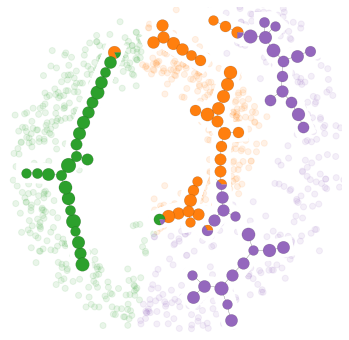

In [7]:
import networkx as nx
from GTDA.GTDA_utils import find_components, plot_reeb_component
import pandas as pd
from matplotlib.colors import to_rgba

gtda = GTDA_record['gtda']
g_reeb = GTDA_record['g_reeb']
reeb_components = find_components(g_reeb,size_thd=0)[1]
# mapping each Reeb graph component to the actual group of samples it represents
reeb_components_to_nodes = {}
for i,reeb_component in enumerate(reeb_components):
    nodes = []
    for reeb_node in reeb_component:
        # mapping a Reeb node to the actual group of samples it represents
        nodes += gtda.final_components_filtered[gtda.filtered_nodes[reeb_node]]
    if len(nodes) > 0:
        reeb_components_to_nodes[i] = np.unique(nodes)


xcoords = np.zeros(g_reeb.shape[0])
ycoords = np.zeros(g_reeb.shape[0])
g_reeb = g_reeb.tocsr()
for k,c in enumerate(reeb_components):
    g_sub = g_reeb[c,:][:,c]
    pos_init = {}
    for i,reeb_node in enumerate(c):
        nodes = gtda.final_components_filtered[gtda.filtered_nodes[reeb_node]]
        pos_init[i] = np.array([np.mean(coords[nodes,0]),np.mean(coords[nodes,1])])
    # compute a layout for each Reeb graph component
    pos_tmp = nx.kamada_kawai_layout(nx.from_scipy_sparse_matrix(g_sub),pos=pos_init,scale=1)
    for i,reeb_node in enumerate(c):
        xcoords[reeb_node] = pos_tmp[i][0]
        ycoords[reeb_node] = pos_tmp[i][1]

component_scales = [4,2,6,8,2,5]
for i,scale in enumerate(component_scales):
    c = reeb_components[i]
    for key in c:
        xcoords[key] *= scale
        ycoords[key] *= scale

for i,c in enumerate(reeb_components):
    nodes = reeb_components_to_nodes[i]
    center_coords = np.mean(coords[nodes],0)
    x_curr_center = np.mean(xcoords[c])
    y_curr_center = np.mean(ycoords[c])
    for j in c:
        xcoords[j] -= (x_curr_center-center_coords[0])
        ycoords[j] -= (y_curr_center-center_coords[1])

df = pd.DataFrame({'x':xcoords,'y':ycoords,'sizes':40*gtda.node_sizes[gtda.filtered_nodes]**0.5})

fig,ax = plt.subplots(figsize=(6,6))

sample_colors = [to_rgba(all_class_colors[pred_labels[i]],alpha=0.1) for i in range(coords.shape[0])]
ax.scatter(coords[:,0],coords[:,1],c=sample_colors,zorder=0)

g_reeb = g_reeb.tocoo()
for ei,ej in zip(g_reeb.row,g_reeb.col):
    ax.plot(
        [xcoords[ei],xcoords[ej]],
        [ycoords[ei],ycoords[ej]],
        c='white',linewidth=20,zorder=1)

fig,ax = plot_reeb_component(g_reeb,df,gtda.node_colors_class[gtda.filtered_nodes],
    labels_to_eval=[0,1,2],all_class_colors=all_class_colors,fig=fig,ax=ax,is_plotting_legend=False)

ax.set_xlim(np.min(xcoords)-1.5,np.max(xcoords)+2.5)
ax.set_ylim(np.min(ycoords)-1,np.max(ycoords)+1)

## Zoom in a component

100%|██████████| 172/172 [00:00<00:00, 297.27it/s]


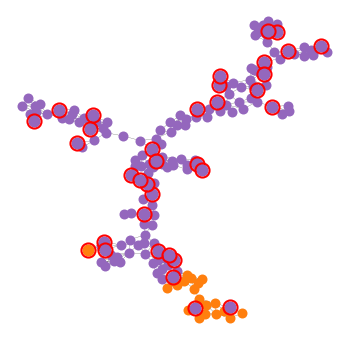

In [8]:
from GTDA.GTDA_utils import plot_subgraph

fig,ax = plt.subplots(figsize=(6,6))
component_index = 5
nodes = reeb_components_to_nodes[component_index]
# gtda.A_reeb is the projected Reeb graph
subg = gtda.A_reeb[nodes,:][:,nodes]
tmp_pos = nx.kamada_kawai_layout(nx.from_scipy_sparse_matrix(subg))
node_colors_pred = [all_class_colors[i] for i in pred_labels[reeb_components_to_nodes[component_index]]]
node_colors_truth = [all_class_colors[i] for i in labels[reeb_components_to_nodes[component_index]]]
tmp_known_nodes = nn_model.train_mask[reeb_components_to_nodes[component_index]] + nn_model.val_mask[reeb_components_to_nodes[component_index]]
fig,ax = plot_subgraph(node_colors_pred,tmp_pos,subg,nodesize=100,fig=fig,ax=ax)
for node in np.nonzero(tmp_known_nodes)[0]:
    ax.scatter(
        [tmp_pos[node][0]],[tmp_pos[node][1]],color=node_colors_truth[node],linewidths=2,s=100)
    ax.scatter(
        [tmp_pos[node][0]],[tmp_pos[node][1]],color=(0,0,0,0),linewidths=2,edgecolors='red',s=200)

## Visualize GTDA estimated errors

Text(0.5, 1.0, 'model uncertainty')

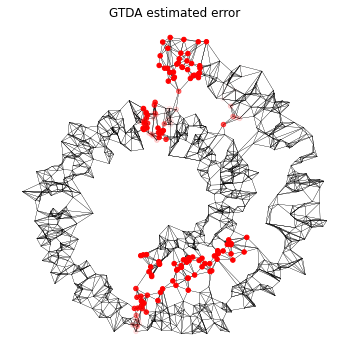

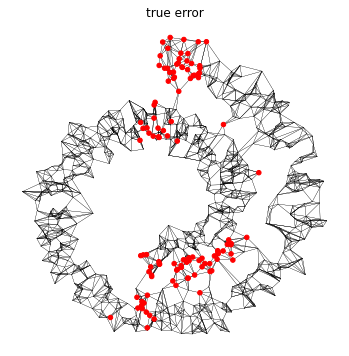

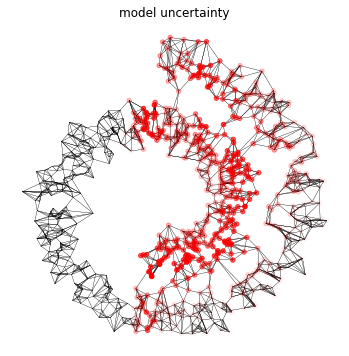

In [9]:
def plot_graph(A,node_colors,coords,fig=None,ax=None,s=20):
    if fig is None:
        fig,ax = plt.subplots()
    ax.scatter(coords[:,0],coords[:,1],c=node_colors,s=s)
    G = A.tocoo()
    for ei,ej in zip(G.row,G.col):
        ax.plot(
            [coords[ei][0],coords[ej][0]],
            [coords[ei][1],coords[ej][1]],
            c='black',zorder=-10,linewidth=0.2)
    ax.axis('off')
    return fig,ax

sample_colors_mixing = (gtda.sample_colors_mixing-np.min(gtda.sample_colors_mixing))/(np.max(gtda.sample_colors_mixing)-np.min(gtda.sample_colors_mixing))
sample_colors_mixing = [(1,0,0,sample_colors_mixing[i]) for i in range(len(labels))]
fig,ax = plt.subplots(figsize=(6,6))
plot_graph(G,sample_colors_mixing,coords,fig=fig,ax=ax,s=20)
ax.set_title('GTDA estimated error')

sample_colors_error = [(1,0,0,gtda.sample_colors_error[i]) for i in range(len(labels))]
fig,ax = plt.subplots(figsize=(6,6))
plot_graph(G,sample_colors_error,coords,fig=fig,ax=ax,s=20)
ax.set_title('true error')

sample_colors_uncertainty = (gtda.sample_colors_uncertainty-np.min(gtda.sample_colors_uncertainty))/(np.max(gtda.sample_colors_uncertainty)-np.min(gtda.sample_colors_uncertainty))
sample_colors_uncertainty = [(1,0,0,sample_colors_uncertainty[i]) for i in range(len(labels))]
fig,ax = plt.subplots(figsize=(6,6))
plot_graph(G,sample_colors_uncertainty,coords,fig=fig,ax=ax,s=20)
ax.set_title('model uncertainty')

## Compute Reeb graph using the original TDA

In [11]:
from GTDA.TDA import TDA

labels_to_eval = [0,1,2]
tda = TDA(nn_model,labels_to_eval)
M,Ar = tda.build_mixing_matrix(standardize=True)
tda.find_reeb_nodes(M,Ar,nbins=5,overlap=(0,0.1))
g_reeb_tda = tda.build_reeb_graph(M)

Generate bins...


100%|██████████| 1000/1000 [00:00<00:00, 18506.79it/s]


Find reeb nodes...


100%|██████████| 29/29 [00:00<00:00, 3488.64it/s]


Build reeb graph...


100%|██████████| 62/62 [00:00<00:00, 6530.23it/s]


## Visualize Reeb graph from the original TDA

100%|██████████| 25/25 [00:00<00:00, 844.53it/s]


(-1.2976319557194984, 1.2976320976252282)

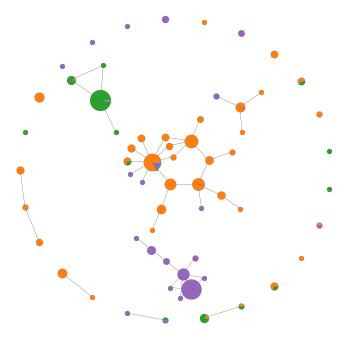

In [12]:
from GTDA.GTDA_utils import extend_coords
from collections import Counter
tda_reeb_components = find_components(g_reeb_tda,size_thd=0)[1]
tda_reeb_components_index = np.argsort([-1*len(c) for c in tda_reeb_components])
labels = nn_model.labels
node_label_ratios = np.zeros((g_reeb_tda.shape[0],M.shape[1]))
node_sizes = np.zeros(g_reeb_tda.shape[0])
for i,c in tda.final_components_unique.items():
    node_sizes[i] = len(c)
    for i1,c1 in Counter(labels[c]).items():
        node_label_ratios[i,i1] = c1/len(c)
node_sizes = 25*node_sizes**0.5
x = np.zeros(g_reeb_tda.shape[0])
y = np.zeros(g_reeb_tda.shape[0])
for j in range(len(tda_reeb_components_index)):
    component = tda_reeb_components[tda_reeb_components_index[j]]
    curr_pos = nx.kamada_kawai_layout(nx.from_scipy_sparse_matrix(g_reeb_tda[component,:][:,component]))
    for i,node in enumerate(component):
        x[node] = curr_pos[i][0]
        y[node] = curr_pos[i][1]
df_tda = pd.DataFrame({'x':x,'y':y,'sizes':node_sizes})
fig,ax = plt.subplots(figsize=(6,6))
component = tda_reeb_components[tda_reeb_components_index[0]]
for i in component:
    x[i] *= 0.5
    y[i] *= 0.5
df_tda = pd.DataFrame({'x':x[component],'y':y[component],'sizes':node_sizes[component]})
plot_reeb_component(
    g_reeb_tda[component,:][:,component],df_tda,node_label_ratios[component],all_class_colors=all_class_colors,
    labels_to_eval=tda.labels_to_eval,is_plotting_legend=False,fig=fig,ax=ax)
component = tda_reeb_components[tda_reeb_components_index[1]]
for i in component:
    x[i] *= 0.3
    y[i] *= 0.3
for i in component:
    y[i] -= 0.8
df_tda = pd.DataFrame({'x':x[component],'y':y[component],'sizes':node_sizes[component]})
plot_reeb_component(
    g_reeb_tda[component,:][:,component],df_tda,node_label_ratios[component],all_class_colors=all_class_colors,
    labels_to_eval=tda.labels_to_eval,is_plotting_legend=False,fig=fig,ax=ax)
component = tda_reeb_components[tda_reeb_components_index[2]]
for i in component:
    x[i] *= 0.3
    y[i] *= 0.3
for i in component:
    x[i] -= 0.6
    y[i] += 0.6
df_tda = pd.DataFrame({'x':x[component],'y':y[component],'sizes':node_sizes[component]})
plot_reeb_component(
    g_reeb_tda[component,:][:,component],df_tda,node_label_ratios[component],all_class_colors=all_class_colors,
    labels_to_eval=tda.labels_to_eval,is_plotting_legend=False,fig=fig,ax=ax)

component = tda_reeb_components[tda_reeb_components_index[3]]
curr_pos = nx.spring_layout(nx.from_scipy_sparse_matrix(g_reeb_tda[component,:][:,component]))
for i,node in enumerate(component):
    x[node] = curr_pos[i][0]*0.2+0.5
    y[node] = curr_pos[i][1]*0.2+0.5
df_tda = pd.DataFrame({'x':x[component],'y':y[component],'sizes':node_sizes[component]})
plot_reeb_component(
    g_reeb_tda[component,:][:,component],df_tda,node_label_ratios[component],all_class_colors=all_class_colors,
    labels_to_eval=tda.labels_to_eval,is_plotting_legend=False,fig=fig,ax=ax)

nodes = []
for k in range(4,len(tda_reeb_components_index)):
    component = tda_reeb_components[tda_reeb_components_index[k]]
    nodes += component
curr_pos = nx.shell_layout(nx.from_scipy_sparse_matrix(g_reeb_tda[nodes,:][:,nodes]),scale=6)
center = np.mean(np.vstack(list(curr_pos.values())),0)
for i,node in enumerate(nodes):
    new_coord = extend_coords(center, curr_pos[i], 0.2)
    x[node] = new_coord[0]
    y[node] = new_coord[1]
df_tda = pd.DataFrame({'x':x[nodes],'y':y[nodes],'sizes':node_sizes[nodes]})
plot_reeb_component(
    g_reeb_tda[nodes,:][:,nodes],df_tda,node_label_ratios[nodes],all_class_colors=all_class_colors,
    labels_to_eval=tda.labels_to_eval,is_plotting_legend=False,fig=fig,ax=ax)

ax.set_xlim(np.min(x)-0.1,np.max(x)+0.1)
ax.set_ylim(np.min(y)-0.1,np.max(y)+0.1)